# Visualização de dados - análise exploratória

- Também conhecida como **EDA** (Exploring Data Analyses), a técnica objetiva **analisar e investigar** conjuntos de dados e **resumir** suas principais características, muitas vezes **usando métodos de visualização de dados**.
- Serve para **identificar o que os dados podem revelar** além da tarefa formal de modelagem ou teste de hipótese e proporciona uma melhor compreensão das variáveis do conjunto de dados e as **relações entre eles**.

## Importações

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bd = pd.read_csv('dados.csv', sep = ';')
bd

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
0,106,SANTANA DO LIVRAMENTO,12240.76,1088666.10
1,113,SANTO ANGELO,16575.82,800669.92
2,118,SAO FRANCISCO DE ASSIS,12037.61,466122.80
3,13,CACAPAVA DO SUL,13674.54,485535.86
4,120,SAO GABRIEL,19912.38,533719.86
...,...,...,...,...
182,372,SANTA VITORIA DO PALMAR,27170.89,760.00
183,107,SANTA BARBARA DO SUL,29654.02,365.00
184,54,GETULIO VARGAS,16876.33,233.01
185,382,NOVA SANTA RITA,25938.38,310.58


In [4]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CODIGO        187 non-null    int64  
 1   MUNICIPIO     187 non-null    object 
 2   PIB           187 non-null    float64
 3   VALOREMPENHO  187 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 6.0+ KB


## Análises gerais

 - Será que tem algum campo de municipio vazio ou repetido?
 - Algum campo nulo ou zero nos atributos de PIB e Valor Empenho?

In [5]:
#verificação de células nulas
bd.isnull().sum() 

CODIGO          0
MUNICIPIO       0
PIB             0
VALOREMPENHO    0
dtype: int64

- não há campos nulos

In [6]:
#verificação de dados repetido no código
bd['CODIGO'].value_counts()

378    4
372    4
259    4
141    4
380    4
      ..
414    1
220    1
75     1
99     1
60     1
Name: CODIGO, Length: 172, dtype: int64

In [7]:
#verificação de dados repetido no código
bd['MUNICIPIO'].value_counts()

SANTA VITORIA DO PALMAR      2
MATO LEITAO                  2
NOVA BOA VISTA               2
SANTO ANTONIO DO PLANALTO    2
TAQUARA                      2
                            ..
SENTINELA DO SUL             1
ROQUE GONZALES               1
MARAU                        1
RESTINGA SECA                1
GUARANI DAS MISSOES          1
Name: MUNICIPIO, Length: 177, dtype: int64

In [8]:
#verificação de dados repetido no código
bd['PIB'].value_counts()

11961.10    2
18676.57    2
19914.82    2
24509.74    2
16581.60    2
           ..
10477.52    1
14153.96    1
34568.53    1
13662.14    1
24363.31    1
Name: PIB, Length: 177, dtype: int64

In [9]:
#verificação de dados repetido no código
bd['VALOREMPENHO'].value_counts()

97594.98     4
760.00       4
208240.50    4
147767.38    4
58868.19     4
            ..
92380.20     1
109582.13    1
193840.83    1
98001.49     1
172.13       1
Name: VALOREMPENHO, Length: 172, dtype: int64

- Há dados repetidos em cada atributo (coluna)

## Análise PIB

- O que podemo inferir dos parâmetros estatísticos?
- Qual município com o valor máx. do PIB
- Qual município com o valor min. do PIB
- O que pode ser inferido do desvio padrão?
- Qual discrepância entre média e 50%

In [10]:
bd['PIB'].describe()

count       187.000000
mean      19808.741337
std       16984.223244
min        8236.630000
25%       13621.455000
50%       17206.190000
75%       21429.165000
max      223848.220000
Name: PIB, dtype: float64

**mean** e **50%** não estão tão distantes

In [11]:
bd[bd['PIB']==bd['PIB'].max()]

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
49,149,TRIUNFO,223848.22,1442759.82


In [12]:
bd[bd['PIB']==bd['PIB'].min()]

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
88,216,REDENTORA,8236.63,60134.0


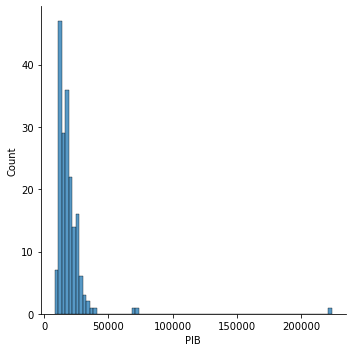

In [13]:
#Histograma PIB
sns.displot(bd['PIB'])

Text(0.5, 1.0, 'PIB')

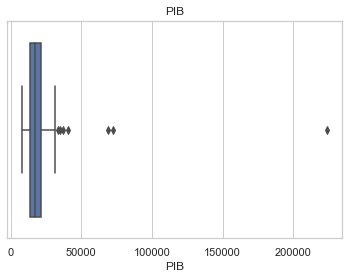

In [14]:
#Boxplot pode-se ver melhor os valores totalmente fora do conjunto concentrado de dados
sns.set_theme(style="whitegrid")
sns.boxplot(x=bd["PIB"]).set_title('PIB')

In [22]:
sns.histplot(data = bd, x = 'ValorEmpenho', y = 'PIB').set_title('PIB')

ValueError: Could not interpret value `ValorEmpenho` for parameter `x`

In [ ]:
plt.rcParams['figure.figsize'] = (11, 7)
plt.scatter(bdm.PIB, bdm.ValorEmpenho, color = 'blue', facecolors = 'none', marker = '*') 
plt.xticks(np.arange(np.min(bdm.PIB[:]), np.max(bdm.PIB[:]), 10))
plt.title('Árvores')
plt.xlabel('Volume')
plt.ylabel('Circunferência')


## Análise ValorEmpenho

In [16]:
bd['VALOREMPENHO'].describe()

count    1.870000e+02
mean     1.299844e+05
std      1.615491e+05
min      1.721300e+02
25%      5.251718e+04
50%      8.422816e+04
75%      1.538961e+05
max      1.442760e+06
Name: VALOREMPENHO, dtype: float64

 - A diferença entre 'mean' e o 50% é grande.

In [17]:
bd[bd['VALOREMPENHO']==bd['VALOREMPENHO'].max()]

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
49,149,TRIUNFO,223848.22,1442759.82


In [18]:
bd[bd['VALOREMPENHO']==bd['VALOREMPENHO'].min()]

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
186,60,GUARANI DAS MISSOES,24363.31,172.13


- Os municípios com o valor empenho máximo e mínimo diferem dos municípios com valor máximo e mínimo de PIB

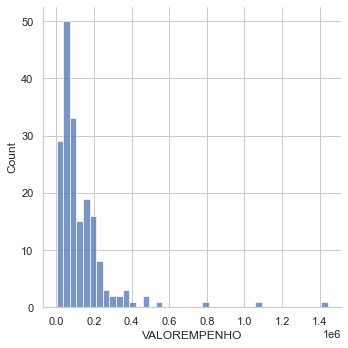

In [19]:
#Histograma
sns.displot(bd['VALOREMPENHO'])

- O gráfico histograma do ValorEmpenho parece com o histograma do PIB 

Text(0.5, 1.0, 'VALOREMPENHO')

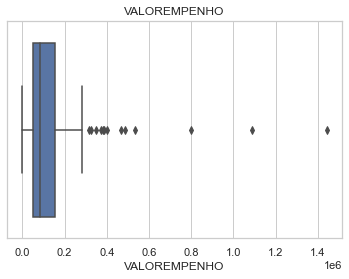

In [20]:
#Boxplot pode-se ver melhor os valores totalmente fora do conjunto concentrado de dados
sns.set_theme(style="whitegrid")
sns.boxplot(x=bd["VALOREMPENHO"]).set_title('VALOREMPENHO')